In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv("topfifty.csv")

In [3]:
df.head()
df.drop_duplicates()
df.drop(['Loudness..dB..', 'Valence.','Speechiness.'], axis=1)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Liveness,Length.,Acousticness..,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,8,191,4,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,8,302,8,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,16,186,12,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,8,198,12,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,11,175,45,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,9,220,9,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,7,131,2,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,8,202,15,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,11,157,5,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,10,194,33,95


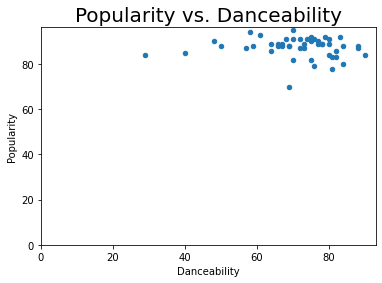

In [4]:
df.plot.scatter(x='Danceability', y='Popularity')
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.title("Popularity vs. Danceability", fontsize=20)
plt.show()

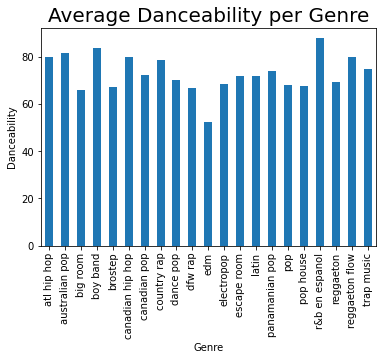

In [5]:
df2 = df.groupby("Genre").Danceability.mean()
df2.plot.bar()
plt.title("Average Danceability per Genre", fontsize=20)
plt.ylabel("Danceability")
plt.show()

Text(0, 0.5, 'Danceability')

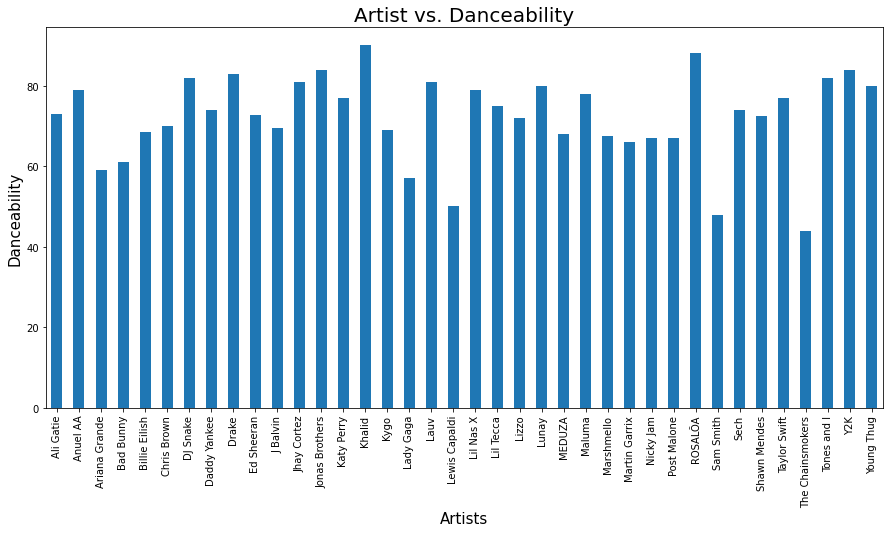

In [6]:
df3 = df.groupby("Artist.Name").Danceability.mean()
df3.plot.bar()
df3.plot.bar(figsize=(15,7));
plt.title("Artist vs. Danceability", fontsize=20)
plt.xlabel("Artists", fontsize=15)
plt.ylabel("Danceability", fontsize=15)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.get('Danceability')
y = df.get('Popularity')

regression_model = LinearRegression()
X= X.values.reshape(-1,1)
regression_model.fit(X, y)
y_predicted = regression_model.predict(X)

rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

print('Slope:', regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-0.02688642]
Intercept: 89.41915288408869
Root mean squared error:  19.669175913206328
R2 score:  0.005099852645102376


In [8]:
from sklearn.metrics import mean_absolute_error
y_true = y
y_pred = regression_model.predict(X)
mean_absolute_error(y_true, y_pred)

3.2342175405590647